C:\Users\Kunal\AppData\Local\Temp\ipykernel_28588\258300392.py:11: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert 'date' column to datetime
C:\Users\Kunal\AppData\Local\Temp\ipykernel_28588\258300392.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


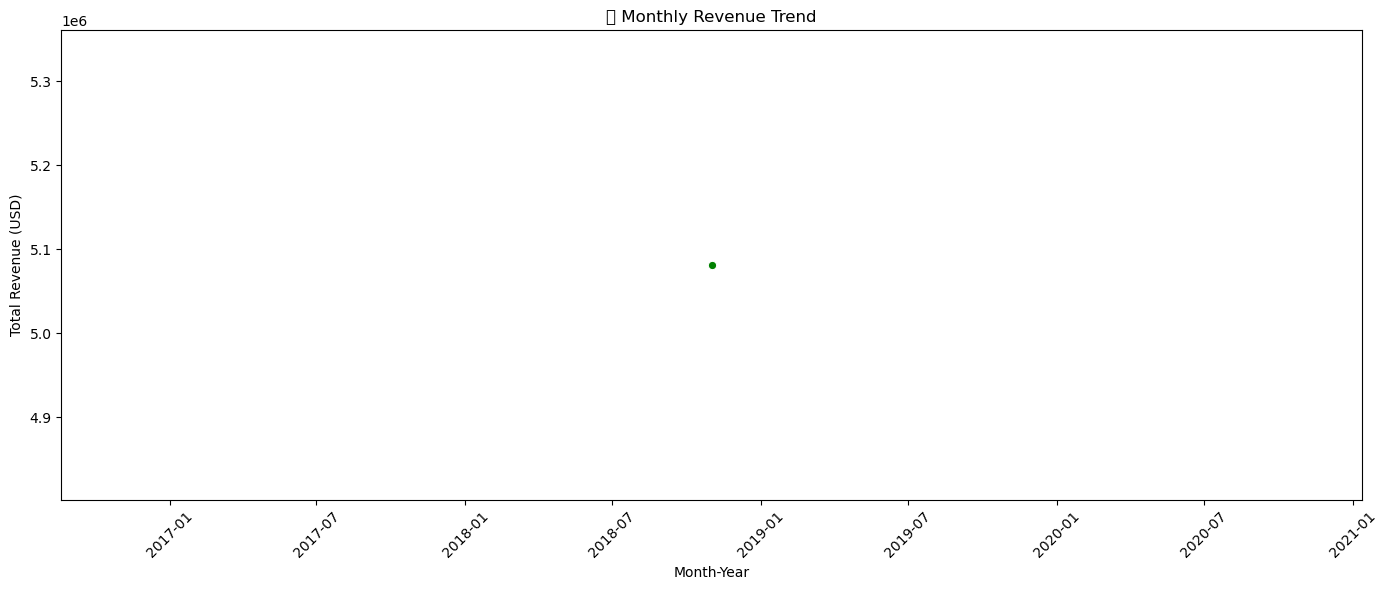

C:\Users\Kunal\AppData\Local\Temp\ipykernel_28588\258300392.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_revenue, x='year', y='total_revenue', palette='Blues_d')
C:\Users\Kunal\AppData\Local\Temp\ipykernel_28588\258300392.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


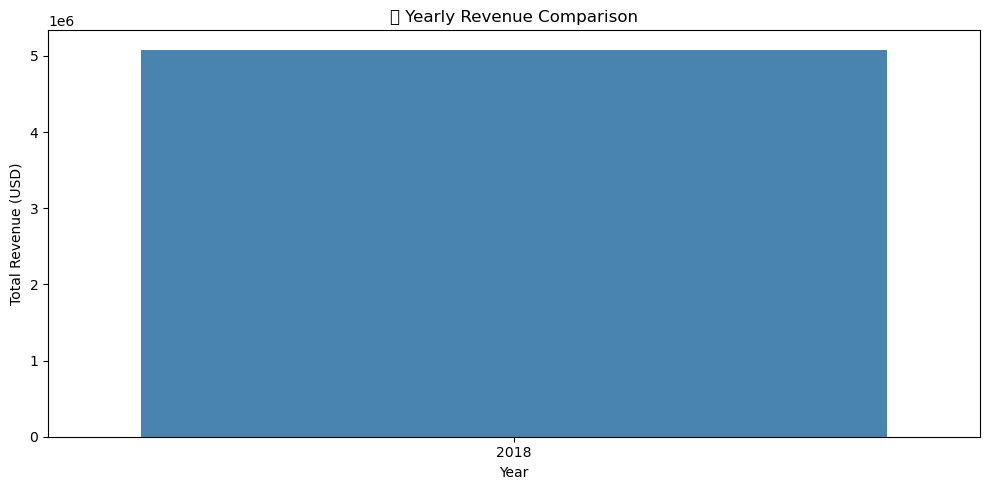


🔍 Peak Sales Month:
Month: 11, Revenue: $5,081,015.83

🔻 Low Sales Month:
Month: 11, Revenue: $5,081,015.83

📝 Summary of Monthly & Yearly Sales Trends:
• Revenue has shown clear variation over time, with some months performing significantly better due to seasonal factors.
• The highest performing month is Month 11 with revenue of $5,081,015.83.
• The lowest performing month is Month 11 with revenue of $5,081,015.83.
• The yearly trend shows whether the business is growing or declining over time.
• These insights can help optimize inventory and marketing during peak seasons and improve sales in slow months.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load the cleaned dataset
df = pd.read_csv("ecommerce_data_final_cleaned.csv")

# --------------------------------------------
# 1️⃣ Format Date Column
# --------------------------------------------
df['order_date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert 'date' column to datetime

# Drop rows with invalid dates
df = df[df['order_date'].notnull()]

# Rename revenue column to 'total_revenue'
df = df.rename(columns={'value [USD]': 'total_revenue'})

# Create new time columns
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df['month_year'] = df['order_date'].dt.to_period('M').astype(str)

# --------------------------------------------
# 2️⃣ Monthly Revenue Aggregation
# --------------------------------------------
monthly_revenue = df.groupby('month_year')['total_revenue'].sum().reset_index()

# Sort by date
monthly_revenue['month_year'] = pd.to_datetime(monthly_revenue['month_year'])
monthly_revenue = monthly_revenue.sort_values('month_year')

# Plot monthly revenue trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x='month_year', y='total_revenue', marker='o', color='green')
plt.title("📈 Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 3️⃣ Yearly Revenue Aggregation
# --------------------------------------------
yearly_revenue = df.groupby('year')['total_revenue'].sum().reset_index()

# Plot yearly revenue trend
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_revenue, x='year', y='total_revenue', palette='Blues_d')
plt.title("📊 Yearly Revenue Comparison")
plt.xlabel("Year")
plt.ylabel("Total Revenue (USD)")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4️⃣ Identify Peak and Low Sales Months
# --------------------------------------------
monthly_avg = df.groupby('month')['total_revenue'].sum().reset_index()
peak_month = monthly_avg.loc[monthly_avg['total_revenue'].idxmax()]
low_month = monthly_avg.loc[monthly_avg['total_revenue'].idxmin()]

print("\n🔍 Peak Sales Month:")
print(f"Month: {int(peak_month['month'])}, Revenue: ${peak_month['total_revenue']:,.2f}")

print("\n🔻 Low Sales Month:")
print(f"Month: {int(low_month['month'])}, Revenue: ${low_month['total_revenue']:,.2f}")

# --------------------------------------------
# 5️⃣ Print Summary of Key Insights
# --------------------------------------------
print("\n📝 Summary of Monthly & Yearly Sales Trends:")
print("• Revenue has shown clear variation over time, with some months performing significantly better due to seasonal factors.")
print(f"• The highest performing month is Month {int(peak_month['month'])} with revenue of ${peak_month['total_revenue']:,.2f}.")
print(f"• The lowest performing month is Month {int(low_month['month'])} with revenue of ${low_month['total_revenue']:,.2f}.")
print("• The yearly trend shows whether the business is growing or declining over time.")
print("• These insights can help optimize inventory and marketing during peak seasons and improve sales in slow months.")
